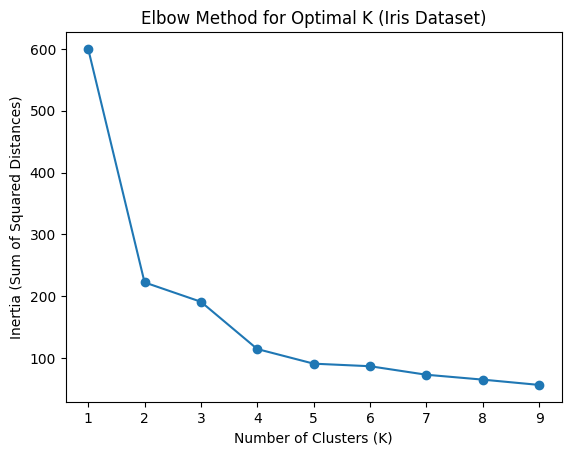

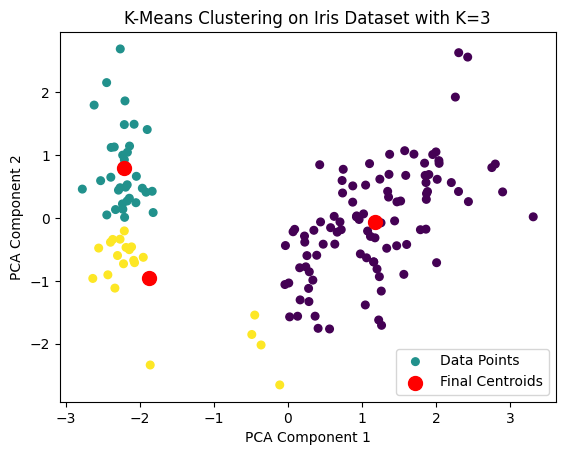

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

class KMeans:
    def __init__(self, K, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        self.centroids = None

    def initialize_centroids(self, X):
        random_indices = np.random.choice(X.shape[0], self.K, replace=False)
        return X[random_indices]

    def assign_clusters(self, X, centroids):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids])
        return np.argmin(distances, axis=0)

    def update_centroids(self, X, labels):
        return np.array([X[labels == k].mean(axis=0) for k in range(self.K)])

    def compute_inertia(self, X, labels, centroids):
        return sum(np.sum((X[labels == k] - centroids[k])**2) for k in range(self.K))

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            labels = self.assign_clusters(X, self.centroids)
            new_centroids = self.update_centroids(X, labels)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
        return self.centroids, labels

inertia_values = []
K_values = range(1, 10)

for k in K_values:
    kmeans = KMeans(K=k)
    centroids, labels = kmeans.fit(X_scaled)
    inertia = kmeans.compute_inertia(X_scaled, labels, centroids)
    inertia_values.append(inertia)

plt.plot(K_values, inertia_values, marker='o')
plt.title("Elbow Method for Optimal K (Iris Dataset)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

K = 3  
kmeans = KMeans(K=K)
centroids, labels = kmeans.fit(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30, label='Data Points')
plt.title(f"K-Means Clustering on Iris Dataset with K={K}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.scatter(pca.transform(kmeans.centroids)[:, 0], pca.transform(kmeans.centroids)[:, 1], s=100, c='red', label='Final Centroids')
plt.legend()
plt.show()
